In [1]:
import pandas as pd
path_to_input_data = "./input-data/cp1500_single_overall_rankings.csv"
input_df = pd.read_csv(path_to_input_data)

In [2]:
input_df

,Pokemon,Score,Dex,Type 1,Type 2,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
0,Machamp (Shadow),95.1,68,fighting,none,136.4,97.2,124,1644073,17.5,1497,Counter,Cross Chop,Rock Slide,5,7,3,50000
1,Vigoroth,94.7,288,normal,none,117.7,112.7,144,1909363,28.5,1499,Counter,Body Slam,Bulldoze,5,9,5,75000
2,Machoke (Shadow),93.8,67,fighting,none,127.7,97.2,141,1750103,27.0,1498,Karate Chop,Cross Chop,Dynamic Punch,5,7,3,50000
3,Wobbuffet,92.8,202,psychic,none,63.0,101.7,333,2133829,50.0,1160,Counter,Return,Mirror Coat,10,8,3,50000
4,Haxorus,92.5,612,dragon,none,151.1,95.7,102,1475018,15.0,1496,Counter,Breaking Swipe,Night Slash,5,5,5,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Spoink,43.5,325,psychic,none,117.6,115.1,140,1896031,50.0,1495,Zen Headbutt,Shadow Ball,Return,10,12,1,10000
391,Mienfoo,43.0,619,fighting,none,143.6,93.8,116,1563337,48.0,1500,Low Kick,Brick Break,Focus Blast,7,15,3,50000
392,Unown,41.7,201,psychic,none,126.9,89.1,125,1412738,50.0,1339,Hidden Power (Psychic),Struggle,NaN,13,0,5,75000
393,Shaymin (Land),40.5,492,grass,none,117.9,122.3,131,1888054,17.0,1492,Zen Headbutt,Grass Knot,Seed Flare,9,13,20,100000


In [3]:
null_series = input_df.isna().sum()
null_filter = input_df["Charged Move 2"].isna()

null_df = input_df.loc[null_filter]
non_null_df = input_df[~null_filter]

null_df

,Pokemon,Score,Dex,Type 1,Type 2,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
392,Unown,41.7,201,psychic,none,126.9,89.1,125,1412738,50.0,1339,Hidden Power (Psychic),Struggle,NaN,13,0,5,75000


In [4]:
# Since this is a Single-Type-League, the 'Type 2' column is irrelevant
single_type_df = non_null_df.drop(columns=['Type 2'])

single_type_df 

,Pokemon,Score,Dex,Type 1,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
0,Machamp (Shadow),95.1,68,fighting,136.4,97.2,124,1644073,17.5,1497,Counter,Cross Chop,Rock Slide,5,7,3,50000
1,Vigoroth,94.7,288,normal,117.7,112.7,144,1909363,28.5,1499,Counter,Body Slam,Bulldoze,5,9,5,75000
2,Machoke (Shadow),93.8,67,fighting,127.7,97.2,141,1750103,27.0,1498,Karate Chop,Cross Chop,Dynamic Punch,5,7,3,50000
3,Wobbuffet,92.8,202,psychic,63.0,101.7,333,2133829,50.0,1160,Counter,Return,Mirror Coat,10,8,3,50000
4,Haxorus,92.5,612,dragon,151.1,95.7,102,1475018,15.0,1496,Counter,Breaking Swipe,Night Slash,5,5,5,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,Munna,44.8,517,psychic,105.9,89.9,166,1580270,50.0,1294,Charge Beam,Psyshock,Dazzling Gleam,5,7,3,50000
390,Spoink,43.5,325,psychic,117.6,115.1,140,1896031,50.0,1495,Zen Headbutt,Shadow Ball,Return,10,12,1,10000
391,Mienfoo,43.0,619,fighting,143.6,93.8,116,1563337,48.0,1500,Low Kick,Brick Break,Focus Blast,7,15,3,50000
393,Shaymin (Land),40.5,492,grass,117.9,122.3,131,1888054,17.0,1492,Zen Headbutt,Grass Knot,Seed Flare,9,13,20,100000


In [145]:
shadow_filter = single_type_df["Pokemon"].map(lambda name: '(Shadow)' in name)

no_shadow_df = single_type_df[~shadow_filter]
shadow_df = single_type_df[shadow_filter]

no_shadow_df

,Pokemon,Score,Dex,Type 1,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
1,Vigoroth,94.7,288,normal,117.7,112.7,144,1909363,28.5,1499,Counter,Body Slam,Bulldoze,5,9,5,75000
3,Wobbuffet,92.8,202,psychic,63.0,101.7,333,2133829,50.0,1160,Counter,Return,Mirror Coat,10,8,3,50000
4,Haxorus,92.5,612,dragon,151.1,95.7,102,1475018,15.0,1496,Counter,Breaking Swipe,Night Slash,5,5,5,75000
5,Machamp,92.4,68,fighting,136.4,97.2,124,1644073,17.5,1497,Counter,Cross Chop,Rock Slide,5,7,3,50000
6,Machoke,92.2,67,fighting,127.7,97.2,141,1750103,27.0,1498,Karate Chop,Cross Chop,Dynamic Punch,5,7,3,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,Munna,44.8,517,psychic,105.9,89.9,166,1580270,50.0,1294,Charge Beam,Psyshock,Dazzling Gleam,5,7,3,50000
390,Spoink,43.5,325,psychic,117.6,115.1,140,1896031,50.0,1495,Zen Headbutt,Shadow Ball,Return,10,12,1,10000
391,Mienfoo,43.0,619,fighting,143.6,93.8,116,1563337,48.0,1500,Low Kick,Brick Break,Focus Blast,7,15,3,50000
393,Shaymin (Land),40.5,492,grass,117.9,122.3,131,1888054,17.0,1492,Zen Headbutt,Grass Knot,Seed Flare,9,13,20,100000


In [6]:
no_shadow_df.describe()

,Score,Dex,Attack,Defense,Stamina,Stat Product,Level,CP,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
count,287.000000,287.000000,287.000000,287.000000,287.000000,2.870000e+02,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,70.928571,378.428571,123.350871,111.745993,133.752613,1.772917e+06,31.130662,1470.679443,7.996516,9.721254,4.153310,49285.714286
std,11.655553,228.446060,15.542828,21.612515,32.720657,2.292499e+05,12.077742,73.136631,4.664625,5.944293,3.894255,24713.644728
min,26.700000,5.000000,63.000000,62.100000,88.000000,1.261556e+06,12.500000,1098.000000,3.000000,3.000000,1.000000,10000.000000
25%,63.300000,161.000000,113.900000,97.650000,118.500000,1.630839e+06,21.250000,1493.000000,5.000000,5.500000,3.000000,50000.000000
50%,70.700000,368.000000,123.700000,110.500000,128.000000,1.760366e+06,26.500000,1497.000000,6.000000,8.000000,3.000000,50000.000000
75%,80.400000,559.500000,134.350000,120.650000,141.000000,1.907929e+06,42.500000,1499.000000,10.000000,12.000000,5.000000,75000.000000
max,94.700000,895.000000,164.600000,198.900000,421.000000,3.188219e+06,50.000000,1500.000000,30.000000,40.000000,20.000000,100000.000000


# Visualising the Raw Data

<Axes: title={'center': 'Distribution of Attack against Defense'}, xlabel='Defense', ylabel='Attack'>

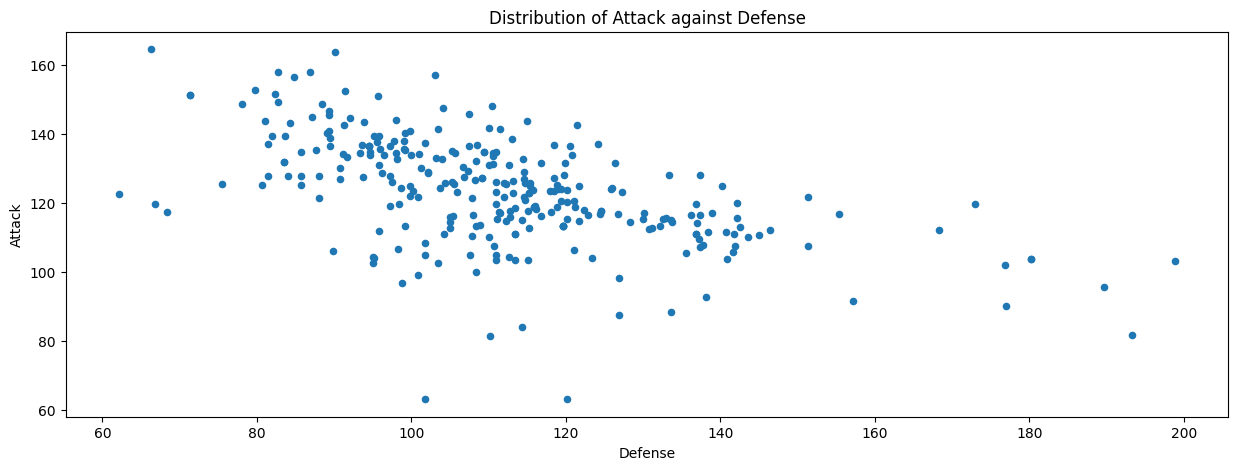

In [148]:
no_shadow_df.plot(kind='scatter', x='Defense', y='Attack',
                  title='Distribution of Attack against Defense',
                  figsize=(15, 5))

<Axes: title={'center': 'Distribution of Attack against Stamina'}, xlabel='Stamina', ylabel='Attack'>

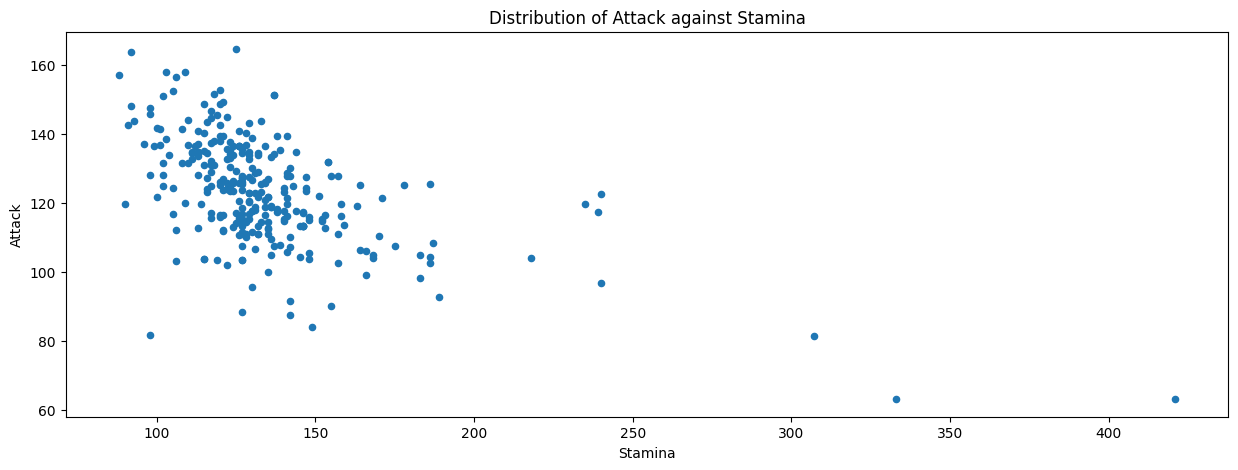

In [45]:
no_shadow_df.plot(kind='scatter', x='Stamina', y='Attack',
                  title='Distribution of Attack against Stamina',
                  figsize=(15, 5))

## The trend we see here is that as the Pokemon's Defense/Stamina increases, the Pokemon's Attack decreases. The result here is not surprising because every Pokemon has a fixed set of IVs which is the sum of their Attack, Defense, and Stamina (HP) stats. A Pokemon with a high attack, is more likely to have a low defense, and low stamina as well.

# Processing the Data


In [149]:
atk_mean, def_mean, stm_mean = no_shadow_df.Attack.mean(), no_shadow_df.Defense.mean(), no_shadow_df.Stamina.mean()
def remean_ivs(row):
    row.Attack = row.Attack - atk_mean
    row.Defense = row.Defense - def_mean
    row.Stamina = row.Stamina - stm_mean
    return row

remean_df = no_shadow_df.apply(remean_ivs, axis='columns')
shadow_remean_df = shadow_df.apply(remean_ivs, axis='columns')
remean_df 

,Pokemon,Score,Dex,Type 1,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
1,Vigoroth,94.7,288,normal,-5.650871,0.954007,10.247387,1909363,28.5,1499,Counter,Body Slam,Bulldoze,5,9,5,75000
3,Wobbuffet,92.8,202,psychic,-60.350871,-10.045993,199.247387,2133829,50.0,1160,Counter,Return,Mirror Coat,10,8,3,50000
4,Haxorus,92.5,612,dragon,27.749129,-16.045993,-31.752613,1475018,15.0,1496,Counter,Breaking Swipe,Night Slash,5,5,5,75000
5,Machamp,92.4,68,fighting,13.049129,-14.545993,-9.752613,1644073,17.5,1497,Counter,Cross Chop,Rock Slide,5,7,3,50000
6,Machoke,92.2,67,fighting,4.349129,-14.545993,7.247387,1750103,27.0,1498,Karate Chop,Cross Chop,Dynamic Punch,5,7,3,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,Munna,44.8,517,psychic,-17.450871,-21.845993,32.247387,1580270,50.0,1294,Charge Beam,Psyshock,Dazzling Gleam,5,7,3,50000
390,Spoink,43.5,325,psychic,-5.750871,3.354007,6.247387,1896031,50.0,1495,Zen Headbutt,Shadow Ball,Return,10,12,1,10000
391,Mienfoo,43.0,619,fighting,20.249129,-17.945993,-17.752613,1563337,48.0,1500,Low Kick,Brick Break,Focus Blast,7,15,3,50000
393,Shaymin (Land),40.5,492,grass,-5.450871,10.554007,-2.752613,1888054,17.0,1492,Zen Headbutt,Grass Knot,Seed Flare,9,13,20,100000


In [142]:
remean_df.loc[(remean_df.Attack > 0) & (remean_df.Defense > 0) & (remean_df.Stamina > 0)]

,Pokemon,Score,Dex,Type 1,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost


## The above shows that there is not a single Pokemon (non-shadow) in this dataset that has above average IVs for all.

In [143]:
remean_df.loc[(remean_df.Attack < 0) & (remean_df.Defense < 0) & (remean_df.Stamina < 0)]

,Pokemon,Score,Dex,Type 1,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
254,Eelektrik,67.3,603,electric,-0.150871,-0.845993,-0.752613,1818238,36.5,1498,Spark,Crunch,Discharge,6,6,1,10000
326,Popplio,60.8,728,water,-9.950871,-12.545993,-6.752613,1428526,50.0,1276,Water Gun,Aqua Tail,Aqua Jet,12,15,3,10000
337,Goldeen,60.0,118,water,-7.350871,-6.745993,-13.752613,1461636,50.0,1302,Mud Shot,Aqua Tail,Horn Attack,4,4,3,50000
364,Piplup,56.1,393,water,-16.650871,-13.445993,-2.752613,1374452,50.0,1215,Bubble,Drill Peck,Icy Wind,4,5,3,10000
367,Clauncher,55.7,692,water,-19.950871,-0.845993,-6.752613,1455967,50.0,1230,Water Gun,Crabhammer,Aqua Jet,17,15,3,50000
370,Totodile,55.3,158,water,-12.450871,-7.545993,-6.752613,1467804,50.0,1279,Water Gun,Crunch,Aqua Jet,15,15,3,10000
385,Meltan,46.3,808,steel,-11.550871,-15.945993,-12.752613,1295420,50.0,1207,Thunder Shock,Thunderbolt,Flash Cannon,7,8,20,100000


## The above shows that there are quite a few Pokemon (non-shadow) in this dataset that has less than average IVs for all.

<Axes: ylabel='Density'>

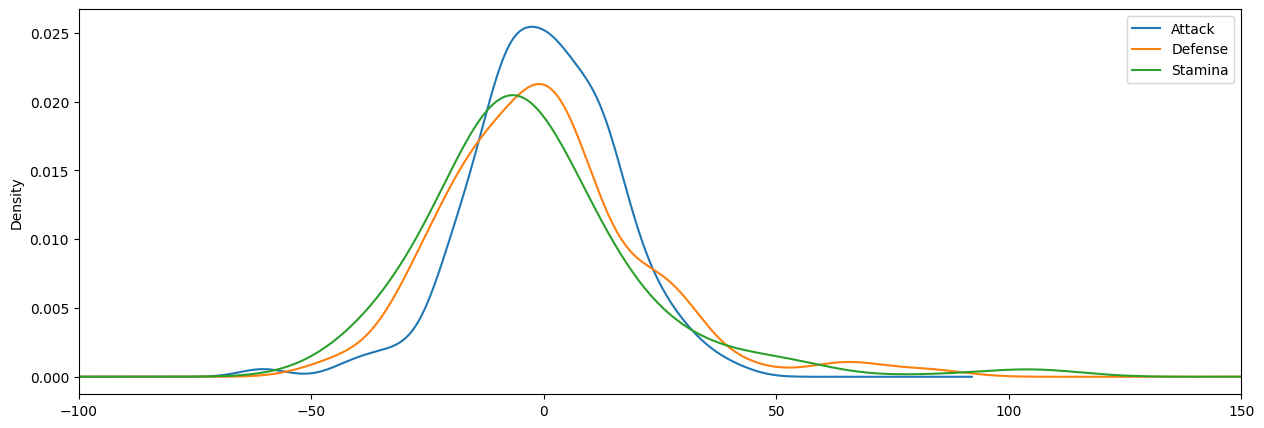

In [170]:
iv_df = remean_df[['Attack', 'Defense', 'Stamina']]

iv_df.plot(kind='kde', 
        #    bw_method=1, 
           figsize=(15,5),
           xlim=(-100, 150))

# Time to analyse the Shadow Pokemon


In [153]:
shadow_df

,Pokemon,Score,Dex,Type 1,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
0,Machamp (Shadow),95.1,68,fighting,136.4,97.2,124,1644073,17.5,1497,Counter,Cross Chop,Rock Slide,5,7,3,50000
2,Machoke (Shadow),93.8,67,fighting,127.7,97.2,141,1750103,27.0,1498,Karate Chop,Cross Chop,Dynamic Punch,5,7,3,50000
10,Pinsir (Shadow),91.3,127,bug,141.3,111.5,101,1591266,18.5,1500,Fury Cutter,Close Combat,X-Scissor,12,9,5,75000
14,Dragonair (Shadow),90.5,148,dragon,126.0,111.0,127,1775090,33.0,1497,Dragon Breath,Body Slam,Aqua Tail,12,12,5,75000
22,Grimer (Shadow),89.4,88,poison,121.5,88.0,171,1827419,49.5,1493,Poison Jab,Mud Bomb,Sludge Bomb,6,8,3,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Koffing (Shadow),58.4,109,poison,112.6,131.1,113,1667925,50.0,1373,Infestation,Dark Pulse,Sludge Bomb,5,5,3,50000
366,Nosepass (Shadow),55.9,299,rock,81.5,193.3,98,1543812,50.0,1123,Rock Throw,Rock Slide,Rock Blast,9,8,3,50000
368,Throh (Shadow),55.7,538,fighting,110.3,107.8,170,2020070,21.5,1493,Low Kick,Body Slam,Focus Blast,7,15,5,75000
369,Totodile (Shadow),55.5,158,water,110.9,104.2,127,1467804,50.0,1279,Water Gun,Crunch,Aqua Jet,15,15,3,10000


In [152]:
shadow_df.describe()

,Score,Dex,Attack,Defense,Stamina,Stat Product,Level,CP,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
count,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,73.585981,223.112150,123.067290,113.773832,132.495327,1.775163e+06,30.925234,1472.009346,8.532710,10.140187,4.317757,49205.607477
std,9.893808,146.953614,15.080199,24.580094,31.001940,1.877696e+05,12.364512,75.431650,5.261677,5.619119,4.301378,25505.729404
min,45.800000,5.000000,63.000000,66.800000,88.000000,1.394782e+06,13.000000,1123.000000,3.000000,3.000000,1.000000,10000.000000
25%,66.200000,105.500000,115.200000,98.700000,117.000000,1.634220e+06,21.250000,1493.000000,5.000000,6.000000,3.000000,50000.000000
50%,73.500000,200.000000,124.100000,111.300000,127.000000,1.773125e+06,26.000000,1497.000000,6.000000,8.000000,3.000000,50000.000000
75%,80.650000,327.000000,132.650000,121.250000,139.500000,1.895562e+06,46.000000,1499.000000,12.000000,14.000000,5.000000,75000.000000
max,95.100000,539.000000,157.900000,198.900000,333.000000,2.353244e+06,50.000000,1500.000000,25.000000,25.000000,20.000000,100000.000000


<Axes: title={'center': 'Distribution of Attack against Defense'}, xlabel='Defense', ylabel='Attack'>

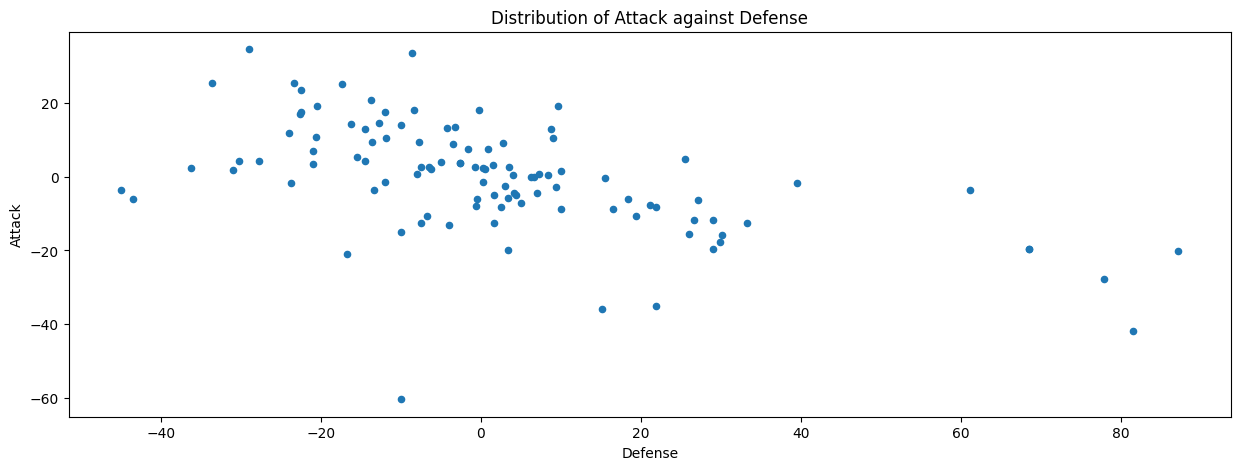

In [150]:
shadow_remean_df.plot(kind='scatter', x='Defense', y='Attack',
                  title='Distribution of Attack against Defense',
                  figsize=(15, 5))

<Axes: title={'center': 'Distribution of Attack against Stamina'}, xlabel='Stamina', ylabel='Attack'>

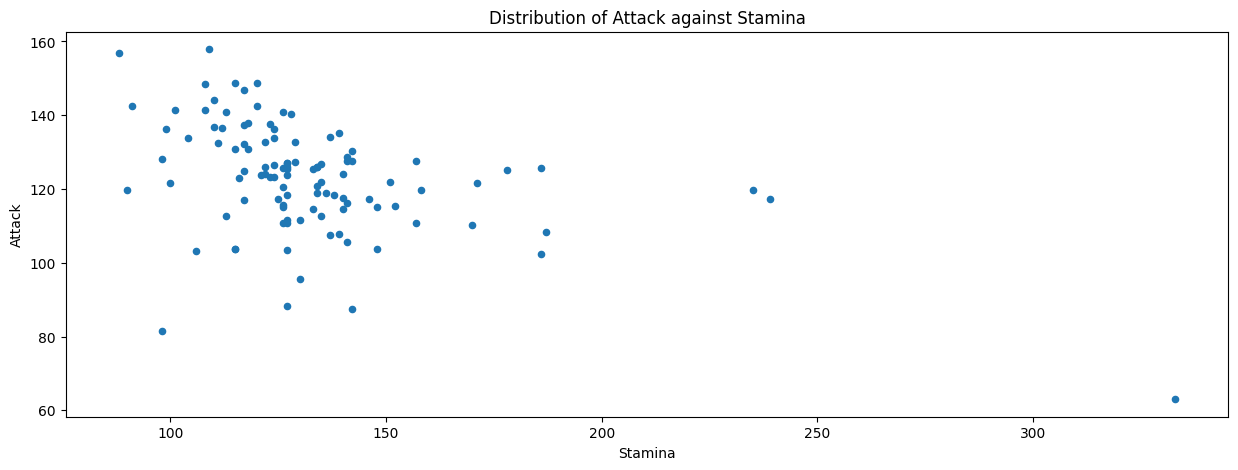

In [151]:
shadow_df.plot(kind='scatter', x='Stamina', y='Attack',
                  title='Distribution of Attack against Stamina',
                  figsize=(15, 5))

In [155]:
shadow_remean_df.loc[(shadow_remean_df.Attack > 0) & (shadow_remean_df.Defense > 0) & (shadow_remean_df.Stamina > 0)]

,Pokemon,Score,Dex,Type 1,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost


## The above shows that there is not a single Pokemon (shadow) in this dataset that has above average IVs for all.

In [156]:
shadow_remean_df.loc[(shadow_remean_df.Attack < 0) & (shadow_remean_df.Defense < 0) & (shadow_remean_df.Stamina < 0)]

,Pokemon,Score,Dex,Type 1,Attack,Defense,Stamina,Stat Product,Level,CP,Fast Move,Charged Move 1,Charged Move 2,Charged Move 1 Count,Charged Move 2 Count,Buddy Distance,Charged Move Cost
369,Totodile (Shadow),55.5,158,water,-12.450871,-7.545993,-6.752613,1467804,50.0,1279,Water Gun,Crunch,Aqua Jet,15,15,3,10000


## The above shows that there is only one Pokemon (shadow) in this dataset that has less than average IVs for all.

<Axes: ylabel='Density'>

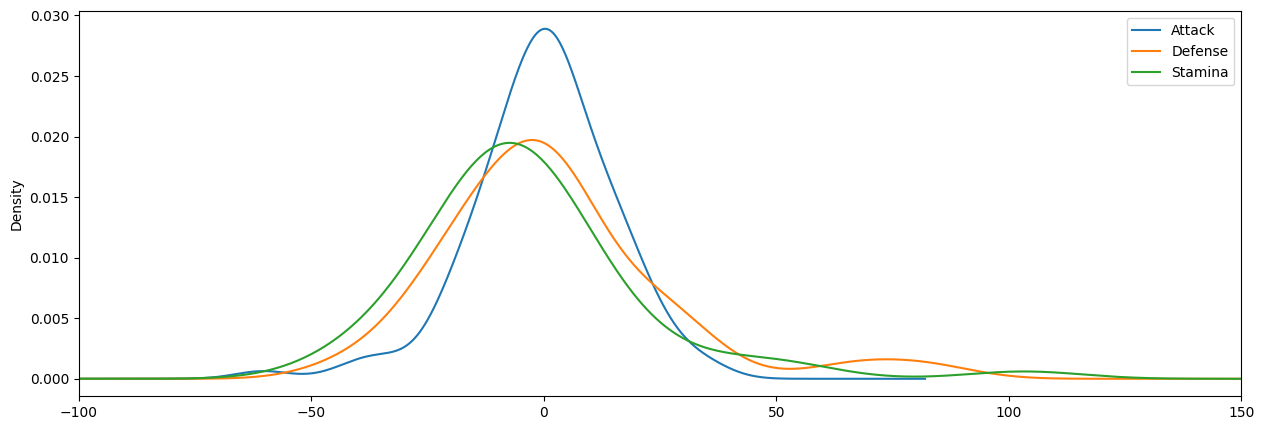

In [164]:
shadow_iv_df = shadow_remean_df[['Attack', 'Defense', 'Stamina']]

shadow_iv_df.plot(kind='kde', 
        #    bw_method=1, 
           figsize=(15,5),
           xlim=(-100, 150))